# Data 422

Lianyin liu :17899438
Kim Van     :68569443
Ancy John   :52770710

## Assignement 2

### 20% of final grade

## Due date: 1pm Tuesday 1 October 2019

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own pair** (or group of three if we are odd) **work**. Avoid plagiarism: if you are not sure what may constitute code plagiarism, read this http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism. Remember, when in doubt **declare your sources**.  
As a general rule, late submission are **highly** unsuggested. The pace of the course is very quick, and you don't want to be working on this too long, as you would have less time for other assignments. I suggest you to submit what you have ready by the time the assignment is due, even if it is not everything we required. For any particular problem, please contact [Thomas Li](thomas.li@canterbury.ac.nz) or [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or TAs.


## Instruction

### Total: 25 marks.

For this assignment you will work with data from the web. Your goal is to scrape it or request it, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter R notebook comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: better comments equal to better marks.  
You can either modify this notebook or write a new one from scratch.

## Comment, explain, present your work in a clear way (1 mark)

## R part (overall 19 marks)

Do use the tidyverse syntax that's introduced in class and labs. If in doubt, refresh the lab material 1 to 4.

### Task (a): scrape it (5 marks)

Identify a website page showing information you find interesting. The information should be presented across more than one page. Select one of this pages (the rest is for later) and using `rvest` (and the suit of `tidyverse` libraries we used so far, plus any other one you may need) get the html into R.

In [1]:
#1
library(tidyverse) #2
library(rvest) #3
library(magrittr) #4
library(purrr) #5
library(glue) #6
library(stringr) #7
library(httr) #8
library(polite) #9

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xml2

Attaching package: ‘rvest’

The following object is masked from ‘package:purrr’:

    pluck

The following object is masked from ‘package:readr’:

    guess_encoding


Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘glue’

The following object is masked from ‘package:dplyr’:

    collapse



#1 To load all the required packages
#2 Collection of R packages
#3 rvest makes scraping easier
#4 To decrease development time and to improve readability and maintainability of code with a new operator, %>% Reference: https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html
#5 Tools for working with functions and vectors
#6 To glue strings to data in R
#7 To handle strings
#8 Tools for working with URLs and HTTP Reference:https://rdrr.io/cran/httr/
#9 polite is the "polite" version of rvest

In [2]:
movie <- read_html('https://www.imdb.com/movies-in-theaters/?ref_=nv_mv_inth') #10

#10 read_html() reads and parses the webpage into R as list

In [3]:
movie

{html_document}
<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body id="styleguide-v2" class="fixed">\n            <img height="1" widt ...

### Task (b): wrangle it (5 marks)


Working on the page from task (a), transform the data you collected into relational data model (that is, one or more data frames). WARNING: you will need to think and motivate how you are doing this in terms of the **data model** you are trying to build; just throwing everything in a table is not enough.

In [5]:
#11 
open <- html_nodes(movie, 'h3') #12 
open <- html_text(open) #13
open <- head(open, -5) #14
open1 <- replicate(8, open[1]) #15
open2 <- replicate(8, open[2])
open <- c(open1,open2) #16

#17 
introduction <- html_nodes(movie, '.outline')
introduction <- html_text(introduction)
introduction <- head(introduction, -1)
introduction

#18 
title <- html_nodes(movie, 'h4')
title <- html_text(title)
title

#19 
run <- html_nodes(movie, 'time')
runtime <- html_text(run)
runtime <- gsub(" min","",runtime) #20
runtime <- as.numeric(runtime) #21
runtime

#22 
user_rate1 <- html_nodes(movie, '.value')
user_rate1 <- html_text(user_rate1)
rate <- replicate(6, 'na')
user_rate <- c(rate, user_rate1)

#23 
movies <- data.frame(open,title,user_rate, runtime,introduction)
movies

[1] "\n    A gritty character study of Arthur Fleck, a man disregarded by society.                    "                                                                                                                                     
 [2] "\n    The film follows an Indian soldier who is assigned to eliminate his former mentor, who had gone rogue.                    "                                                                                                      
 [3] "\n    A film director reflects on the choices he's made in life as past and present come crashing down around him.                    "                                                                                                
 [4] "\n    Astronaut Lucy Cola returns to Earth after a transcendent experience during a mission to space, and begins to lose touch with reality in a world that now seems too small.                    "                                  
 [5] "\n    A look at Roger Waters' 2017-2018 concert tour.                    "                                                                                                                                                             
 [6] "\n    In Florida, parents can hire Wrinkles the Clown to scare their misbehaving children.                    "                                                                                                                        
 [7] "\n    A magical Yeti must return to his family.                    "                                                                                                                                                                   
 [8] "\n    The continuing story of the Crawley family, wealthy owners of a large estate in the English countryside in the early 20th century.                    "                                                                          
 [9] "\n    Inspired by the viral New York Magazine article, Hustlers follows a crew of savvy former strip club employees who band together to turn the tables on their Wall Street clients.                    "                            
[10] "\n    Twenty-seven years after their first encounter with the terrifying Pennywise, the Losers Club have grown up and moved away, until a devastating phone call brings them back.                    "                                
[11] "\n    Astronaut Roy McBride undertakes a mission across an unforgiving solar system to uncover the truth about his missing father and his doomed expedition that now, 30 years later, threatens the universe.                    "     
[12] "\n    Rambo must confront his past and unearth his ruthless combat skills to exact revenge in a final mission.                    "                                                                                                    
[13] "\n    Legendary performer Judy Garland arrives in London in the winter of 1968 to perform a series of sold-out concerts.                    "                                                                                          
[14] "\n    Three 6th grade boys ditch school and embark on an epic journey while carrying accidentally stolen drugs, being hunted by teenage girls, and trying to make their way home in time for a long-awaited party.                    "
[15] "\n    After the murder of his father, a young lion prince flees his kingdom only to learn the true meaning of responsibility and bravery.                    "                                                                         
[16] "\n    Secret Service Agent Mike Banning is framed for the attempted assassination of the President and must evade his own agency and the FBI as he tries to uncover the real threat.                    "

[1] " Joker (2019)"                   " War (2019)"                    
 [3] " Dolor y gloria (2019)"          " Lucy in the Sky (2019)"        
 [5] " Roger Waters: Us + Them (2019)" " Wrinkles the Clown (2019)"     
 [7] " Abominable (2019)"              " Downton Abbey (2019)"          
 [9] " Hustlers (2019)"                " It Chapter Two (2019)"         
[11] " Ad Astra (2019)"                " Rambo: Last Blood (2019)"      
[13] " Judy (2019)"                    " Good Boys (2019)"              
[15] " The Lion King (2019)"           " Angel Has Fallen (2019)"

[1] 121 154 113 124 135  75  97 122 110 169 123  89 118  90 118 121

open                                  title                          
1  Opening This Week - October 4          Joker (2019)                  
2  Opening This Week - October 4          War (2019)                    
3  Opening This Week - October 4          Dolor y gloria (2019)         
4  Opening This Week - October 4          Lucy in the Sky (2019)        
5  Opening This Week - October 4          Roger Waters: Us + Them (2019)
6  Opening This Week - October 4          Wrinkles the Clown (2019)     
7  Opening This Week - October 4          Abominable (2019)             
8  Opening This Week - October 4          Downton Abbey (2019)          
9  In Theaters Now - Box Office Top Ten   Hustlers (2019)               
10 In Theaters Now - Box Office Top Ten   It Chapter Two (2019)         
11 In Theaters Now - Box Office Top Ten   Ad Astra (2019)               
12 In Theaters Now - Box Office Top Ten   Rambo: Last Blood (2019)      
13 In Theaters Now - Box Office Top Ten   Judy (2019)                   
14 In Theaters Now - Box Office Top Ten   Good Boys (2019)              
15 In Theaters Now - Box Office Top Ten   The Lion King (2019)          
16 In Theaters Now - Box Office Top Ten   Angel Has Fallen (2019)       
   user_rate runtime
1  na        121    
2  na        154    
3  na        113    
4  na        124    
5  na        135    
6  na         75    
7  7.3        97    
8  7.8       122    
9  6.6       110    
10 7         169    
11 7.1       123    
12 6.8        89    
13 7         118    
14 6.9        90    
15 7.1       118    
16 6.7       121    
   introduction                                                                                                                                                                                                                          
1  \n    A gritty character study of Arthur Fleck, a man disregarded by society.                                                                                                                                                         
2  \n    The film follows an Indian soldier who is assigned to eliminate his former mentor, who had gone rogue.                                                                                                                          
3  \n    A film director reflects on the choices he's made in life as past and present come crashing down around him.                                                                                                                    
4  \n    Astronaut Lucy Cola returns to Earth after a transcendent experience during a mission to space, and begins to lose touch with reality in a world that now seems too small.                                                      
5  \n    A look at Roger Waters' 2017-2018 concert tour.                                                                                                                                                                                 
6  \n    In Florida, parents can hire Wrinkles the Clown to scare their misbehaving children.                                                                                                                                            
7  \n    A magical Yeti must return to his family.                                                                                                                                                                                       
8  \n    The continuing story of the Crawley family, wealthy owners of a large estate in the English countryside in the early 20th century.                                                                                              
9  \n    Inspired by the viral New York Magazine article, Hustlers follows a crew of savvy former strip club employees who band together to turn the tables on their Wall Street clients.                                                
10 \n    Twenty-seven years after their first encounter with the 

#11 get opening time from website
#12 To select nodes from an HTML document from rvest
#13 To extract text from an HTML document from rvest
#14 To return first part (except first 5 number of elements) of the vector 'open'. Reference : https://www.rdocumentation.org/packages/utils/versions/3.6.1/topics/head 
#15 To repeat a randomized experiment several times and to store the results in a vector. Reference:https://www.quora.com/Why-and-when-do-we-use-a-replicate-function-in-R
#16 To combine values into a vector or list
#17 To get outline as introduction from website
#18 To get title of the movie
#19 To get runtime
#20 Global replace function, which replaces all instances of the substring. Reference:http://www.datasciencemadesimple.com/sub-gsub-function-in-r/
#21 To convert as a numeric value. Reference: https://www.rdocumentation.org/packages/h2o/versions/3.26.0.2/topics/as.numeric
#22 To get user rating
#23 To create a new data frame 'movies' that stores all these data

### Task (c): automate it (5 marks)

Now it's the time to scrape everything else in the website. Turn your code for tasks (a) and (b) into a function and using `purrr` (and its `map_` functions, possibly in combination with `possibly`) apply that function to all the pages you are interested in (as we have done in lab 6); the output of the task should be a relation dataset (i.e., one or more dataframes, and if more than one, explicit their relationships).

In [6]:
#24 
movies %<>% mutate(Link = movie %>%  #25
    html_nodes('h4') %>%      
    html_nodes('a') %>%
    html_attrs() %>% #26
    map_chr("href")) #27

movies 

open                                  title                          
1  Opening This Week - October 4          Joker (2019)                  
2  Opening This Week - October 4          War (2019)                    
3  Opening This Week - October 4          Dolor y gloria (2019)         
4  Opening This Week - October 4          Lucy in the Sky (2019)        
5  Opening This Week - October 4          Roger Waters: Us + Them (2019)
6  Opening This Week - October 4          Wrinkles the Clown (2019)     
7  Opening This Week - October 4          Abominable (2019)             
8  Opening This Week - October 4          Downton Abbey (2019)          
9  In Theaters Now - Box Office Top Ten   Hustlers (2019)               
10 In Theaters Now - Box Office Top Ten   It Chapter Two (2019)         
11 In Theaters Now - Box Office Top Ten   Ad Astra (2019)               
12 In Theaters Now - Box Office Top Ten   Rambo: Last Blood (2019)      
13 In Theaters Now - Box Office Top Ten   Judy (2019)                   
14 In Theaters Now - Box Office Top Ten   Good Boys (2019)              
15 In Theaters Now - Box Office Top Ten   The Lion King (2019)          
16 In Theaters Now - Box Office Top Ten   Angel Has Fallen (2019)       
   user_rate runtime
1  na        121    
2  na        154    
3  na        113    
4  na        124    
5  na        135    
6  na         75    
7  7.3        97    
8  7.8       122    
9  6.6       110    
10 7         169    
11 7.1       123    
12 6.8        89    
13 7         118    
14 6.9        90    
15 7.1       118    
16 6.7       121    
   introduction                                                                                                                                                                                                                          
1  \n    A gritty character study of Arthur Fleck, a man disregarded by society.                                                                                                                                                         
2  \n    The film follows an Indian soldier who is assigned to eliminate his former mentor, who had gone rogue.                                                                                                                          
3  \n    A film director reflects on the choices he's made in life as past and present come crashing down around him.                                                                                                                    
4  \n    Astronaut Lucy Cola returns to Earth after a transcendent experience during a mission to space, and begins to lose touch with reality in a world that now seems too small.                                                      
5  \n    A look at Roger Waters' 2017-2018 concert tour.                                                                                                                                                                                 
6  \n    In Florida, parents can hire Wrinkles the Clown to scare their misbehaving children.                                                                                                                                            
7  \n    A magical Yeti must return to his family.                                                                                                                                                                                       
8  \n    The continuing story of the Crawley family, wealthy owners of a large estate in the English countryside in the early 20th century.                                                                                              
9  \n    Inspired by the viral New York Magazine article, Hustlers follows a crew of savvy former strip club employees who band together to turn the tables on their Wall Street clients.                                                
10 \n    Twenty-seven years after their first encounter with the 

#24 To get a link for each movie into the dataframe
#25 To add new column variable
#26 To retrieve an attribute
#27 To return a vector

In [7]:
#28 
rating <- function(link){
  rating <- glue('https://www.imdb.com{link}') %>% #29 
    read_html() %>% #30 
    html_nodes('.ratingValue') %>% #31 
    html_text() 
  result <- strsplit(rating,'\n') #32 
  return(result[[1]][2])
}

safe_rating <- purrr::possibly(.f = rating, #33 
                                   otherwise = NA) #34 

#35 
directors <- function(link){
  directors1 <- glue('https://www.imdb.com{link}') %>%
    read_html() %>%
    html_nodes('.credit_summary_item') %>%
    html_text()
  result <-  strsplit(directors1[1],'\n')
  return(result[[1]][3])
}
safe_directors <- purrr::possibly(.f = directors, #36 
                                   otherwise = NA) #37 

#38 
writer <- function(link){
  writer1 <- glue('https://www.imdb.com{link}') %>%
    read_html() %>%
    html_nodes('.credit_summary_item') %>%
    html_text()
  result <-  strsplit(writer1[2],'\n')
  return(result[[1]][3])
}
safe_writer <- purrr::possibly(.f = writer, #39 
                                   otherwise = NA) #40 

#28 create a function that goes through all movies on the website and collect the ratings of each movie
#29 paste string
#30 read html website
#31 find the nodes in html file
#32 split the string apart and collect the correct information that we want
#33 the function that we want to make safer
#34 the value we get back if .f fails
#35 create a function that goes through all movies on the website and collect the directors of each movie
#36 the function that we want to make safer
#37 the value we get back if .f fails
#38 create a function that goes through all movies on the website and collect the writers of each movie
#39 the function that we want to make safer
#40 the value we get back if .f fails

In [8]:
#41
new_movies <- movies %>%
    slice(1:7) %>%
    mutate(Directors = map_chr(Link, safe_directors), Writer = map_chr(Link, safe_writer), Rating = map_chr(Link, safe_rating))

new_movies

open                           title                           user_rate
1 Opening This Week - October 4   Joker (2019)                   na       
2 Opening This Week - October 4   War (2019)                     na       
3 Opening This Week - October 4   Dolor y gloria (2019)          na       
4 Opening This Week - October 4   Lucy in the Sky (2019)         na       
5 Opening This Week - October 4   Roger Waters: Us + Them (2019) na       
6 Opening This Week - October 4   Wrinkles the Clown (2019)      na       
7 Opening This Week - October 4   Abominable (2019)              7.3      
  runtime
1 121    
2 154    
3 113    
4 124    
5 135    
6  75    
7  97    
  introduction                                                                                                                                                                                        
1 \n    A gritty character study of Arthur Fleck, a man disregarded by society.                                                                                                                       
2 \n    The film follows an Indian soldier who is assigned to eliminate his former mentor, who had gone rogue.                                                                                        
3 \n    A film director reflects on the choices he's made in life as past and present come crashing down around him.                                                                                  
4 \n    Astronaut Lucy Cola returns to Earth after a transcendent experience during a mission to space, and begins to lose touch with reality in a world that now seems too small.                    
5 \n    A look at Roger Waters' 2017-2018 concert tour.                                                                                                                                               
6 \n    In Florida, parents can hire Wrinkles the Clown to scare their misbehaving children.                                                                                                          
7 \n    A magical Yeti must return to his family.                                                                                                                                                     
  Link                              
1 /title/tt7286456/?ref_=inth_ov_tt 
2 /title/tt7430722/?ref_=inth_ov_tt 
3 /title/tt8291806/?ref_=inth_ov_tt 
4 /title/tt4682804/?ref_=inth_ov_tt 
5 /title/tt10121372/?ref_=inth_ov_tt
6 /title/tt9097270/?ref_=inth_ov_tt 
7 /title/tt6324278/?ref_=inth_ov_tt 
  Directors                                    
1 Todd Phillips                                
2 Siddharth Anand                              
3 Pedro Almodóvar                              
4 Noah Hawley                                  
5 Sean Evans, Roger Waters                     
6 Michael Beach Nichols                        
7 Jill Culton, Todd Wilderman (co-director)    
  Writer                                                               
1 Todd Phillips, Scott Silver                                          
2 Siddharth Anand (screenplay), Siddharth Anand (story)            |   
3 Pedro Almodóvar                                                      
4 Brian C. Brown (story by), Elliott DiGuiseppi (story by)            |
5 Rufat Aliyev, Farshid Azizi, Nikoo Bafti            |                
6 Michael Beach Nichols, Christopher K. Walker                         
7 Jill Culton                                                          
  Rating                    
1 9.4/10                    
2 NA                        
3 7.7/10                    
4 4.5/10                    
5 5.8/10                    
6 6.8/10                    
7 7.3/10

#41 create a new dataframe from the 'movies' dataframe then add three new columns which are Director, Writer, Rating

### Task (d): plot it (2 marks)

Use graphics (via `ggplot`) to represent the data you collected in a meaningful way.

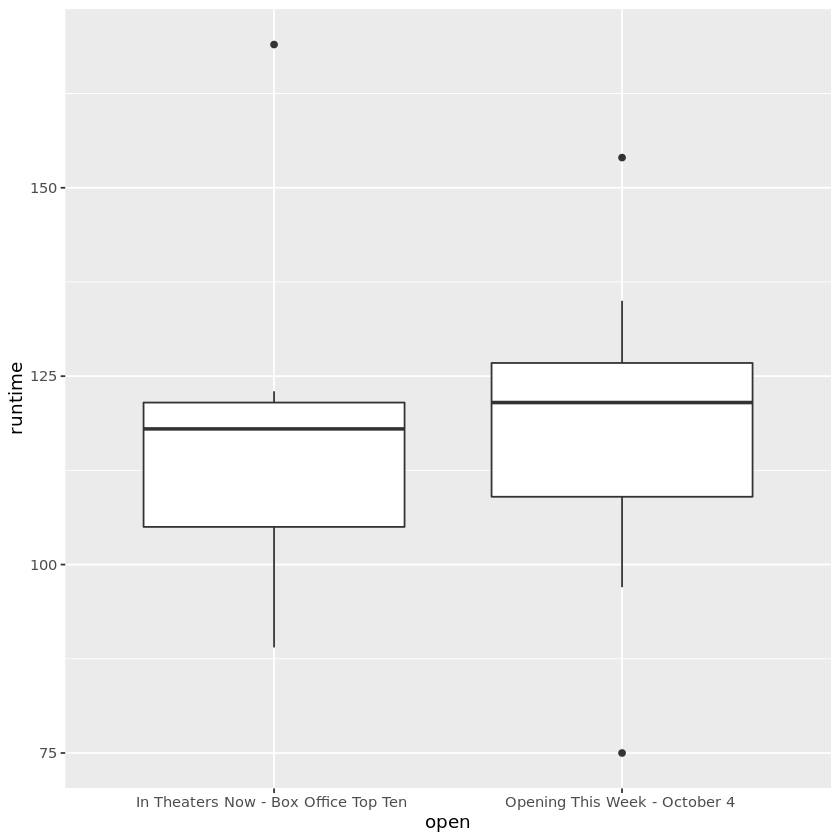

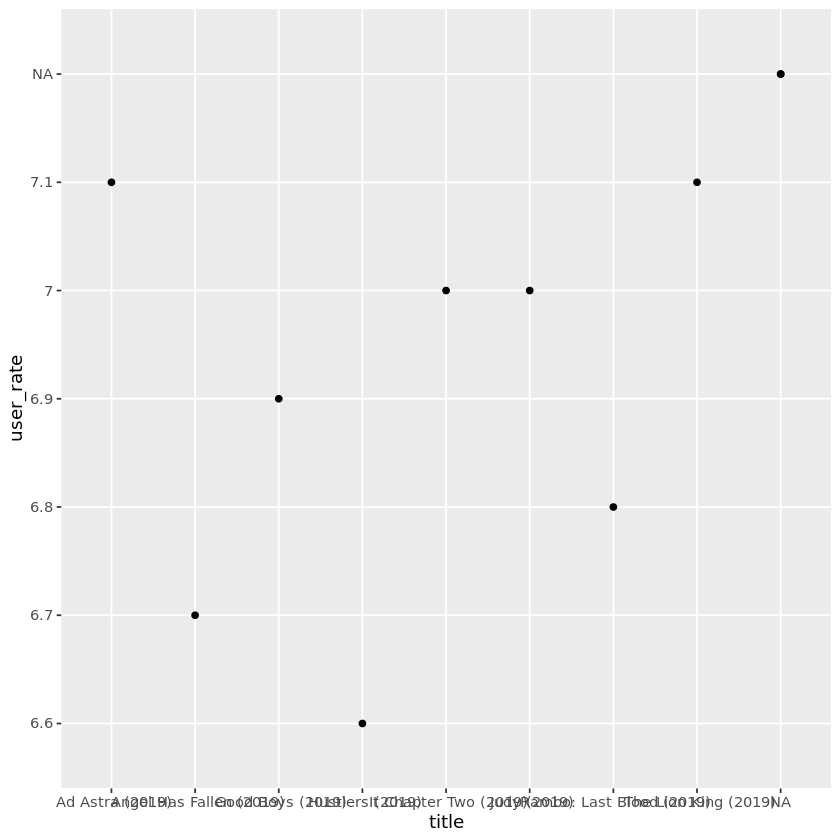

In [9]:
#42
ggplot(movies, aes(open, runtime)) +
  geom_boxplot()

#43
movierate <- movies[c(9,10,11,12,13,14,15,16,17,18),]
ggplot(movierate, aes(title, user_rate)) +
  geom_point()

#42 plot 1: It shows the distribution of runtime in different sessions.
#43 plot 2: It shows the user rate for each movie which is in Theaters Now.

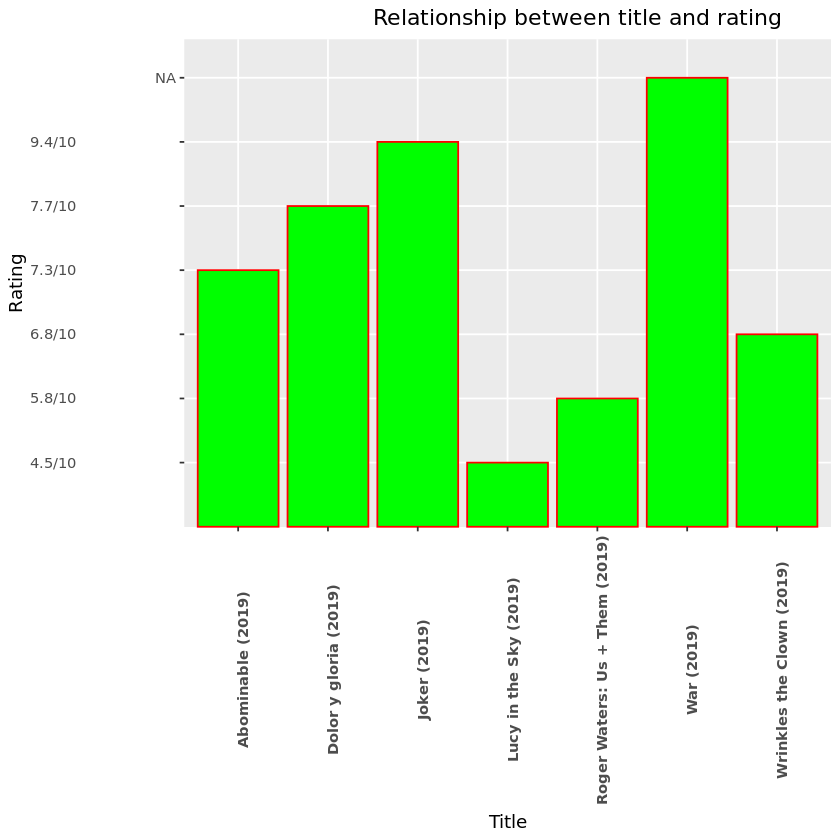

In [10]:
#44 
ploting_title_rating <- new_movies %>%
        ggplot(aes(x = title, y = Rating)) +
        xlab('Title')+
        ylab('Rating')+
        ggtitle('                           Relationship between title and rating')+
        geom_bar(stat="identity",  fill="green", color='red')+theme(axis.text.x = element_text(face="bold", angle=90))
ploting_title_rating

#44 create a new plot that shows relationship between movie title and movie rate. It shows different visulization of the movies rating.

### Task (e): APIs (2 marks)

Identify a web service offering data through an API. Access the API using `httr` and collect the information you care about. Convert the data into a dataframe (or more than one). Represent it graphically in a meaningful way.

Github provides data through an API. So we deices to collect all the data

In [11]:
query <- '?q=data422' #45 
url <- glue("https://api.github.com/search/repositories{query}") #46 
r <- GET(url) #47 
header <- headers(r) #48 
content <- content(r) #49 
header
content

$date
[1] "Mon, 30 Sep 2019 22:09:19 GMT"

$`content-type`
[1] "application/json; charset=utf-8"

$`transfer-encoding`
[1] "chunked"

$server
[1] "GitHub.com"

$status
[1] "200 OK"

$`x-ratelimit-limit`
[1] "10"

$`x-ratelimit-remaining`
[1] "9"

$`x-ratelimit-reset`
[1] "1569881419"

$`cache-control`
[1] "no-cache"

$`x-github-media-type`
[1] "github.v3"

$`access-control-expose-headers`
[1] "ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type"

$`access-control-allow-origin`
[1] "*"

$`strict-transport-security`
[1] "max-age=31536000; includeSubdomains; preload"

$`x-frame-options`
[1] "deny"

$`x-content-type-options`
[1] "nosniff"

$`x-xss-protection`
[1] "1; mode=block"

$`referrer-policy`
[1] "origin-when-cross-origin, strict-origin-when-cross-origin"

$`content-security-policy`
[1] "default-src 'none'"

$`content-encoding`
[1] "gzip"

$vary
[1] "Accept-Encoding"

$`x-github-request-id`
[1] "73AD:0602:64059B:73F2E8:5D927D0F"

attr(,"class")
[1] "insensitive" "list"

$total_count
[1] 4

$incomplete_results
[1] FALSE

$items
$items[[1]]
$items[[1]]$id
[1] 208160724

$items[[1]]$node_id
[1] "MDEwOlJlcG9zaXRvcnkyMDgxNjA3MjQ="

$items[[1]]$name
[1] "Data422-Project"

$items[[1]]$full_name
[1] "matthodgett/Data422-Project"

$items[[1]]$private
[1] FALSE

$items[[1]]$owner
$items[[1]]$owner$login
[1] "matthodgett"

$items[[1]]$owner$id
[1] 55261833

$items[[1]]$owner$node_id
[1] "MDQ6VXNlcjU1MjYxODMz"

$items[[1]]$owner$avatar_url
[1] "https://avatars2.githubusercontent.com/u/55261833?v=4"

$items[[1]]$owner$gravatar_id
[1] ""

$items[[1]]$owner$url
[1] "https://api.github.com/users/matthodgett"

$items[[1]]$owner$html_url
[1] "https://github.com/matthodgett"

$items[[1]]$owner$followers_url
[1] "https://api.github.com/users/matthodgett/followers"

$items[[1]]$owner$following_url
[1] "https://api.github.com/users/matthodgett/following{/other_user}"

$items[[1]]$owner$gists_url
[1] "https://api.github.com/users/matthodgett/gists{/gist_id}"

$items[[1]]$owner$starred_url
[1] "https://api.github.com/users/matthodgett/starred{/owner}{/repo}"

$items[[1]]$owner$subscriptions_url
[1] "https://api.github.com/users/matthodgett/subscriptions"

$items[[1]]$owner$organizations_url
[1] "https://api.github.com/users/matthodgett/orgs"

$items[[1]]$owner$repos_url
[1] "https://api.github.com/users/matthodgett/repos"

$items[[1]]$owner$events_url
[1] "https://api.github.com/users/matthodgett/events{/privacy}"

$items[[1]]$owner$received_events_url
[1] "https://api.github.com/users/matthodgett/received_events"

$items[[1]]$owner$type
[1] "User"

$items[[1]]$owner$site_admin
[1] FALSE


$items[[1]]$html_url
[1] "https://github.com/matthodgett/Data422-Project"

$items[[1]]$description
NULL

$items[[1]]$fork
[1] FALSE

$items[[1]]$url
[1] "https://api.github.com/repos/matthodgett/Data422-Project"

$items[[1]]$forks_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/forks"

$items[[1]]$keys_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/keys{/key_id}"

$items[[1]]$collaborators_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/collaborators{/collaborator}"

$items[[1]]$teams_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/teams"

$items[[1]]$hooks_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/hooks"

$items[[1]]$issue_events_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/issues/events{/number}"

$items[[1]]$events_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/events"

$items[[1]]$assignees_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/assignees{/user}"

$items[[1]]$branches_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/branches{/branch}"

$items[[1]]$tags_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/tags"

$items[[1]]$blobs_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/git/blobs{/sha}"

$items[[1]]$git_tags_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/git/tags{/sha}"

$items[[1]]$git_refs_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/git/refs{/sha}"

$items[[1]]$trees_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/git/trees{/sha}"

$items[[1]]$statuses_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/statuses/{sha}"

$items[[1]]$languages_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/languages"

$items[[1]]$stargazers_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/stargazers"

$items[[1]]$contributors_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/contributors"

$items[[1]]$subscribers_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/subscribers"

$items[[1]]$subscription_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/subscription"

$items[[1]]$commits_url
[1] "https://api.github.com/repos/matthodgett/Data422-Project/commits{/sha}"

$items[[1]]

#45 create a query for data422 search
#46 store website url into a variable
#47 store response request into a variable
#48 store the header of the response request into a variable
#49 store the body of the response request into a variable

In [12]:
#50 create a dataframe that wrangles from the response request
data422_df <- tibble( 
        search_keywords = query,
        server = header$server,
        status = header$status,
        content_type = header$'content-type',
        date = header$date,
        total_search = content[1])
data422_df

search_keywords server     status content_type                   
1 ?q=data422      GitHub.com 200 OK application/json; charset=utf-8
  date                          total_search
1 Mon, 30 Sep 2019 22:09:19 GMT 4

#50 create a dataframe that wrangles from the response request

In [13]:
query <- 'data201' #51 
url <- glue("https://api.github.com/search/repositories?q={query}") #52 
r <- GET(url) #53 
header <- headers(r) #54 
content <- content(r) #55 

#56 
data201_df <- tibble( 
        search_keywords = query,
        server = header$server,
        status = header$status,
        content_type = header$'content-type',
        date = header$date,
        total_search = content[1])
data201_df

search_keywords server     status content_type                   
1 data201         GitHub.com 200 OK application/json; charset=utf-8
  date                          total_search
1 Mon, 30 Sep 2019 22:14:44 GMT 60

#51 create a query for data201 search
#52 store website url into a variable
#53 store response request into a variable
#54 store the header of the response request into a variable
#55 store the body of the response request into a variable
#56 create a dataframe that wrangles from the response request

In [14]:
combine_df <- rbind(data201_df, data422_df) #57 
combine_df

search_keywords server     status content_type                   
1 data201         GitHub.com 200 OK application/json; charset=utf-8
2 ?q=data422      GitHub.com 200 OK application/json; charset=utf-8
  date                          total_search
1 Mon, 30 Sep 2019 22:14:44 GMT 60          
2 Mon, 30 Sep 2019 22:09:19 GMT 4

#57 join two dataframes into one dataframe
All other references done from the lab sessions of this course